IMPORT

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

Clean data


In [2]:
df = pd.read_csv('../ML/dataset/SQLiV3.csv', encoding='unicode_escape') # Read the dataset.
df.head(10)

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,1,NaN,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
5,select name from syscolumns where id = ...,1,NaN,NaN
6,select * from users where id = 1 +$+ or 1 =...,1,NaN,NaN
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,NaN,NaN
8,select * from users where id = '1' or ||/1 ...,1,NaN,NaN
9,select * from users where id = '1' or \.<\ ...,1,NaN,NaN


In [3]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29303 entries, 0 to 29302
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  25961 non-null  object
 1   Label     25719 non-null  object
dtypes: object(2)
memory usage: 458.0+ KB


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25709 entries, 0 to 29302
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  25709 non-null  object
 1   Label     25709 non-null  object
dtypes: object(2)
memory usage: 602.6+ KB


fixing label error


In [6]:
unique_label = pd.unique(df['Label'])

print('\n'.join(l for l in unique_label))

1
 OR
 --
waitfor delay '0:0:__TIME__'--
 drop table temp --
0
 grant resource to name
 EXEC SelectAllCustomers
 /*Select all the columns of all the records in the Customers table:*/
*/
 CREATE VIEW [Products Above Average Price] AS
 CREATE OR REPLACE VIEW view_name AS
 DROP TABLE Suppliers
 CREATE PROCEDURE SelectAllCustomers AS
  EXEC SelectAllCustomers
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'
 CREATE OR REPLACE VIEW [Brazil Customers] AS
  SELECT * FROM CustomersLIMIT 3
SELECT * FROM Customers
 SELECT TOP 50 PERCENT * FROM Customers
 SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY
SELECT TOP 3 * FROM Customers
 SELECT * FROM Customers
SELECT SUM ( Quantity ) 
 SELECT column_name ( s ) 
 SELECT City FROM Customers


In [7]:
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.
df['Label'] = df['Label'].astype('int') # Convert the label type to integer.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25674 entries, 0 to 29302
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  25674 non-null  object
 1   Label     25674 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 501.4+ KB


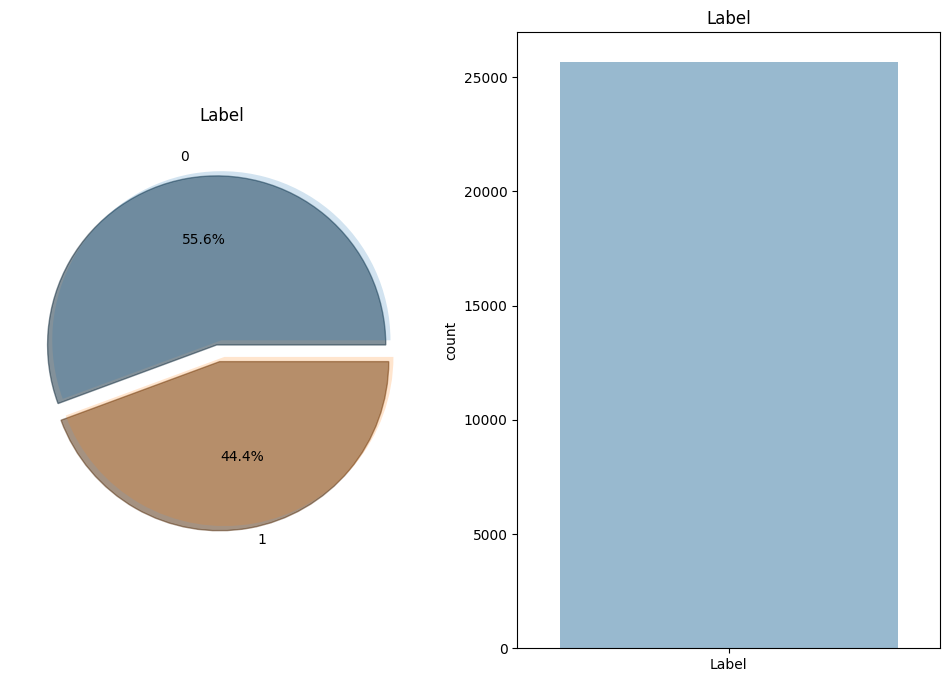

In [8]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot(data=df,ax=ax[1], alpha=0.5)
ax[1].set_title('Label')
plt.show()

In [9]:
df.to_csv('final.csv')

In [97]:
df.head()
print("df.shape: ", df.shape)

df.shape:  (25664, 2)


traning section


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import keras

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))

In [11]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(25674,) (25674,)
Dataset Input: 
 0                    " or pg_sleep  (  __TIME__  )  --
1    create user name identified by pass123 tempora...
2     AND 1  =  utl_inaddr.get_host_address   (    ...
3     select * from users where id  =  '1' or @ @1 ...
4     select * from users where id  =  1 or 1#"  ( ...
Name: Sentence, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int32


In [132]:
import nltk
nltk.download('stopwords')

X = vectorizer.fit_transform(X.values.astype('U')).toarray()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [13]:
X

<25674x22815 sparse matrix of type '<class 'numpy.float64'>'
	with 168662 stored elements in Compressed Sparse Row format>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20539, 22815)
(20539,)
(5135, 22815)
(5135,)


In [15]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

Naive Bay

In [26]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

joblib.dump(nb_clf, 'Naive Bayv2')

Accuracy of Naive Bayes on test set : 0.7877403388539882
F1 Score of Naive Bayes on test set : 0.8004295686414891


['Naive Bayv2']

In [122]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.7226874391431354
F1 Score of SVM on test set : 0.5585864848109113


In [16]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.7740993184031159
F1 Score of Random Forest on test set : 0.7959183673469388


In [139]:
# Function to plot the history graphs of the training and validation curves during training
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [141]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,6349)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 6349)
X_test1 = X_test.reshape(-1, 1, 6349)

history = model.fit(X_train1, y_train, epochs = 10, validation_data = (X_test1, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 32)             203200    
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 204,289
Trainable params: 204,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
642/642 [==============================] - 4s 5ms/step - loss: 0.2219 - accuracy: 0.9242 - val_loss: 0.1150 - val_accuracy: 0.9585
Epoch 2/10
642/642 [==================

In [157]:
y_pred = model.predict(X_test1).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/conv1d_2/Conv1D' defined at (most recent call last):
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_2600\2413634177.py", line 1, in <module>
      model.predict(X)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\ASUS\miniconda3\envs\datasci\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_1/conv1d_2/Conv1D'
convolution input must be 4-dimensional: [1,10,6347]
	 [[{{node sequential_1/conv1d_2/Conv1D}}]] [Op:__inference_predict_function_38524]

In [149]:
joblib.dump(model, 'cnn')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-12 01:37:00         2448
metadata.json                                  2023-02-12 01:37:00           64
variables.h5                                   2023-02-12 01:37:00      2475328


['cnn']

In [150]:
rf_ = joblib.load('cnn')
rf_

In [127]:
joblib.dump(vectorizer, 'vectorizerv4')

['vectorizerv4']

In [42]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [154]:
vector= joblib.load('vectorizerv3')

In [17]:
X=["'; INSERT INTO users(username) VALUES(J)-- ",
 "'; INSERT INTO users(password) VALUES(zg3xeMg2WkWd6a)#",
 "'; INSERT INTO employee(work_background, fname, lname, employee_id, nickname) VALUES(Blee27mXJk0uj5, DgpzUdZkmLLyM, EO, Y, awdcGLaKohd)-- ",
 "'; INSERT INTO employee(address, house_registration, work_background, nickname) VALUES(mcfuKnGJU404Ld, uJw0uRztoAz, StXQjWO3unqAMDN, DkKpT)# ",
 "'; INSERT INTO users(password) VALUES(diF8SbRsZbSM)-- ",
 "'; INSERT INTO customer(customer_id, tel) VALUES(m7YDj, 0803609663)#",
 "'; INSERT INTO users(password) VALUES(NqmmV)-- ",
 "'; INSERT INTO service(price) VALUES(600)# ",
 "'; INSERT INTO employee(employee_id, lname, nickname, email, fname) VALUES(rH, CIxdNt, Xj, oVgCYVcd, Vh)# ",
 "'; INSERT INTO users(username) VALUES(clkmkimyn)# "]
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [18]:
rf_clf.predict(X)

ValueError: X has 40 features, but RandomForestClassifier is expecting 22815 features as input.

In [35]:
X.shape

(4, 6509)

In [ ]:
vectorizer.pre